In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

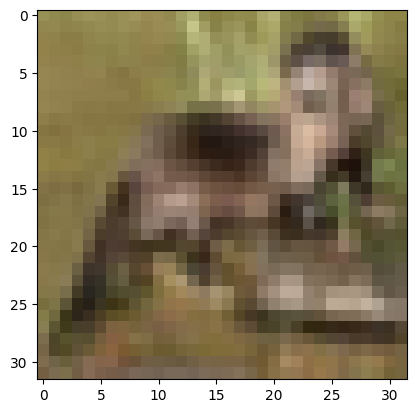

so:  [55]


In [ ]:
n = 100
import matplotlib.pyplot as plt
digit = x_train[n]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so: ',y_train[n])

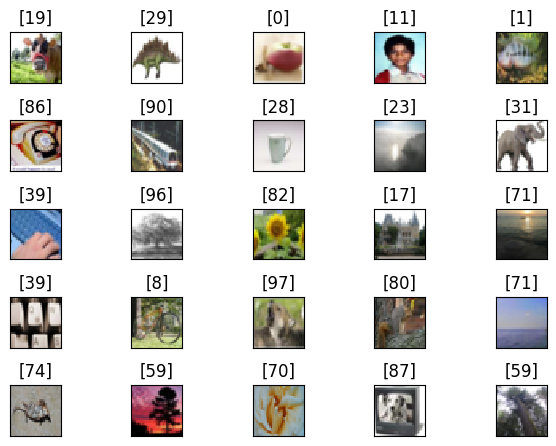

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray',interpolation='none')
  plt.title(format(y_train[i]))
  plt.xticks([ ])
  plt.yticks([ ])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(9000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 9000)              27657000  
                                                                 
 dense_15 (Dense)            (None, 3000)              27003000  
                                                                 
 dense_16 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 dense_18 (Dense)            (None, 100)               50100     
                                                                 
Total params: 58,211,600
Trainable params: 58,211,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X=x_test
Y=y_test

In [ ]:
X.shape

(10000, 32, 32, 3)

In [ ]:
Y.shape

(10000, 1)

In [ ]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_test.shape

(10000, 100)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mat mat: ',test_loss)
print('Do chinh xac: ',test_acc)

Epoch 1/10
391/391 [==============================] - 778s 2s/step - loss: 4.5092 - accuracy: 0.0397
Epoch 2/10
391/391 [==============================] - 872s 2s/step - loss: 4.0092 - accuracy: 0.0785
Epoch 3/10
391/391 [==============================] - 870s 2s/step - loss: 3.7968 - accuracy: 0.1145
Epoch 4/10
391/391 [==============================] - 859s 2s/step - loss: 3.6312 - accuracy: 0.1426
Epoch 5/10
391/391 [==============================] - 855s 2s/step - loss: 3.5159 - accuracy: 0.1642
Epoch 6/10
391/391 [==============================] - 854s 2s/step - loss: 3.4147 - accuracy: 0.1802
Epoch 7/10
391/391 [==============================] - 857s 2s/step - loss: 3.3221 - accuracy: 0.1981
Epoch 8/10
391/391 [==============================] - 854s 2s/step - loss: 3.2325 - accuracy: 0.2130
Epoch 9/10
391/391 [==============================] - 841s 2s/step - loss: 3.1517 - accuracy: 0.2293
Epoch 10/10
313/313 [==============================] - 47s 150ms/step - loss: 3.4591 - accu

In [ ]:
model.save('Cifar100.h5')

In [ ]:
from keras.models import load_model
model10=load_model('Cifar100.h5')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array

img = load_img('/content/91757458.png',target_size=(32,32))

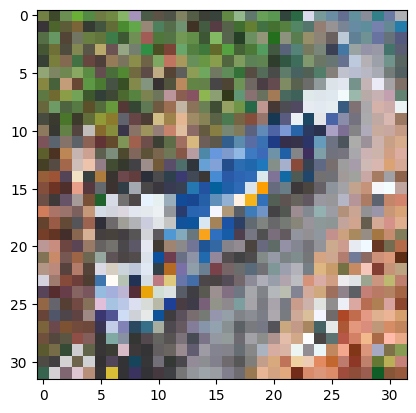

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 266ms/step


array([39])

*# Mục mới